In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

import tensorflow as tf
import keras
from keras.models import load_model, Sequential
from keras.layers import Dense, Dropout, Input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pickle import dump
from IPython.display import clear_output

In [2]:
#loading the dataset
%time df = pd.read_csv('result.csv')

#converting date from string to datetime64 format
df['date'] = df['date'].astype('int64')
df['date']=pd.to_datetime(df['date'].astype(str), format='%Y-%m-%d')

#choosing proper time period
df = df[df['date'] >= '2000-01-01']

df.drop(columns=['Unnamed: 0',],inplace=True)

df.index = range(df.shape[0])
df.dropna(inplace=True)

Wall time: 403 ms


In [3]:
#dividing the dataset
X = df[df['date'] < '2020-01-01']
X = df[df.columns[5:]]

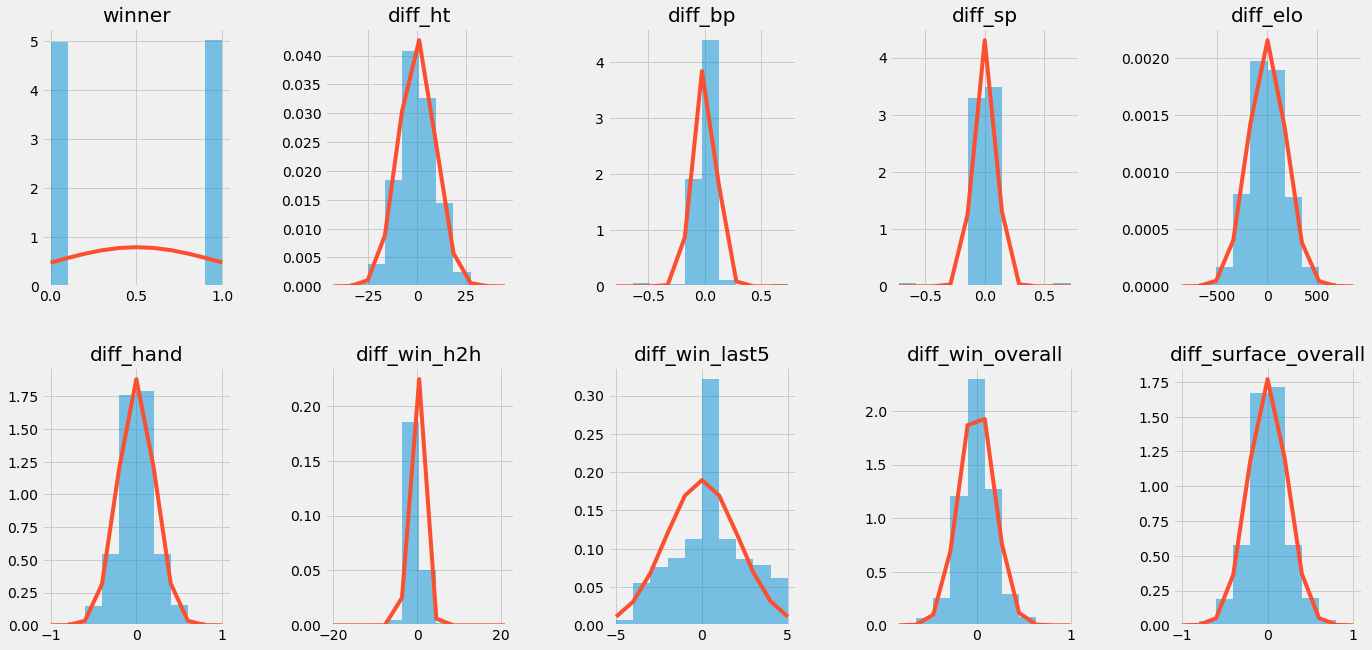

In [4]:
#Checking distribution of dataset
names = {0: X.columns[:5], 1: X.columns[5:]}
plt.style.use("fivethirtyeight")
fig, axs = plt.subplots(2, 5)
for i in range(2):
    for j, k in zip(range(5), names[i]):
        _, bins, _ = axs[i,j].hist(X[k], density=True, alpha=0.5)
        mu, sigma = scipy.stats.norm.fit(X[k])
        best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
        axs[i, j].plot(bins, best_fit_line)
        axs[i, j].title.set_text(k)
fig.set_size_inches(20,10)
fig.tight_layout(pad=3.0)

y = X.pop('winner')
fig.savefig('distribution')

In [5]:
X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,diff_ht,diff_bp,diff_sp,diff_elo,diff_hand,diff_win_h2h,diff_win_last5,diff_win_overall,diff_surface_overall
diff_ht,1.00,0.20,0.21,0.10,0.09,0.01,0.08,0.10,0.08
diff_bp,0.20,1.00,0.89,0.26,0.44,0.08,0.22,0.50,0.40
diff_sp,0.21,0.89,1.00,0.27,0.46,0.08,0.23,0.53,0.43
diff_elo,0.10,0.26,0.27,1.00,0.70,0.32,0.71,0.79,0.63
diff_hand,0.09,0.44,0.46,0.70,1.00,0.25,0.47,0.87,0.70
diff_win_h2h,0.01,0.08,0.08,0.32,0.25,1.00,0.14,0.26,0.22
diff_win_last5,0.08,0.22,0.23,0.71,0.47,0.14,1.00,0.53,0.44
diff_win_overall,0.10,0.50,0.53,0.79,0.87,0.26,0.53,1.00,0.80
diff_surface_overall,0.08,0.40,0.43,0.63,0.70,0.22,0.44,0.80,1.00


In [6]:
X_val = df[df['date'] >= '2020-01-01']
X_val = X_val[X_val.columns[5:]]
y_val = X_val.pop('winner')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=420)

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)


In [9]:
dump(scaler, open('scaler.pkl', 'wb'))

In [10]:
def create_model(neurons=32, dropout_rate=0.5, learning_rate=0.001):
    network = Sequential()
    network.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)))
    network.add(Dropout(dropout_rate))
    network.add(Dense(1, activation='sigmoid'))

    network.compile(loss='binary_crossentropy', 
                    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
                    metrics=["accuracy"]) 

    return network

In [11]:
neural_net = create_model(64, 0.5, 0.001) 
es = EarlyStopping(monitor='val_loss', mode='min', patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
%time history = neural_net.fit(X_train, y_train, epochs=1000, verbose=1, validation_data=(X_test, y_test), callbacks=[mc,es])

Epoch 1/1000
1178/1178 [==============================] - 5s 2ms/step - loss: 0.6486 - accuracy: 0.6277 - val_loss: 0.6083 - val_accuracy: 0.6655
Epoch 2/1000
1178/1178 [==============================] - 2s 2ms/step - loss: 0.6106 - accuracy: 0.6655 - val_loss: 0.6081 - val_accuracy: 0.6665
Epoch 3/1000
1178/1178 [==============================] - 2s 1ms/step - loss: 0.6094 - accuracy: 0.6669 - val_loss: 0.6068 - val_accuracy: 0.6651
Epoch 4/1000
1178/1178 [==============================] - 2s 2ms/step - loss: 0.6108 - accuracy: 0.6656 - val_loss: 0.6071 - val_accuracy: 0.6671
Epoch 5/1000
1178/1178 [==============================] - 2s 2ms/step - loss: 0.6101 - accuracy: 0.6668 - val_loss: 0.6075 - val_accuracy: 0.6665
Epoch 6/1000
1178/1178 [==============================] - 2s 1ms/step - loss: 0.6101 - accuracy: 0.6672 - val_loss: 0.6067 - val_accuracy: 0.6656
Epoch 7/1000
1178/1178 [==============================] - 2s 2ms/step - loss: 0.6068 - accuracy: 0.6698 - val_loss: 0.6069 -

Epoch 57/1000
1178/1178 [==============================] - 2s 1ms/step - loss: 0.6074 - accuracy: 0.6706 - val_loss: 0.6058 - val_accuracy: 0.6655
Epoch 58/1000
1178/1178 [==============================] - 2s 2ms/step - loss: 0.6054 - accuracy: 0.6712 - val_loss: 0.6062 - val_accuracy: 0.6657
Epoch 59/1000
1178/1178 [==============================] - 2s 2ms/step - loss: 0.6079 - accuracy: 0.6694 - val_loss: 0.6057 - val_accuracy: 0.6656
Epoch 60/1000
1178/1178 [==============================] - 2s 2ms/step - loss: 0.6069 - accuracy: 0.6728 - val_loss: 0.6066 - val_accuracy: 0.6661
Epoch 61/1000
1178/1178 [==============================] - 2s 2ms/step - loss: 0.6070 - accuracy: 0.6732 - val_loss: 0.6067 - val_accuracy: 0.6664
Epoch 62/1000
1178/1178 [==============================] - 2s 2ms/step - loss: 0.6115 - accuracy: 0.6689 - val_loss: 0.6062 - val_accuracy: 0.6666
Epoch 63/1000
1178/1178 [==============================] - 2s 2ms/step - loss: 0.6057 - accuracy: 0.6730 - val_loss: 0

1178/1178 [==============================] - 2s 2ms/step - loss: 0.6068 - accuracy: 0.6672 - val_loss: 0.6062 - val_accuracy: 0.6665
Epoch 113/1000
1178/1178 [==============================] - 2s 1ms/step - loss: 0.6105 - accuracy: 0.6645 - val_loss: 0.6058 - val_accuracy: 0.6664
Epoch 114/1000
1178/1178 [==============================] - 2s 1ms/step - loss: 0.6068 - accuracy: 0.6696 - val_loss: 0.6060 - val_accuracy: 0.6665
Epoch 115/1000
1178/1178 [==============================] - 2s 1ms/step - loss: 0.6064 - accuracy: 0.6730 - val_loss: 0.6061 - val_accuracy: 0.6670
Epoch 116/1000
1178/1178 [==============================] - 2s 2ms/step - loss: 0.6084 - accuracy: 0.6715 - val_loss: 0.6060 - val_accuracy: 0.6667
Epoch 117/1000
1178/1178 [==============================] - 2s 2ms/step - loss: 0.6051 - accuracy: 0.6716 - val_loss: 0.6065 - val_accuracy: 0.6655
Epoch 118/1000
1178/1178 [==============================] - 2s 1ms/step - loss: 0.6095 - accuracy: 0.6681 - val_loss: 0.6078 - 

1178/1178 [==============================] - 2s 2ms/step - loss: 0.6035 - accuracy: 0.6747 - val_loss: 0.6069 - val_accuracy: 0.6661
Epoch 168/1000
1178/1178 [==============================] - 2s 2ms/step - loss: 0.6087 - accuracy: 0.6665 - val_loss: 0.6064 - val_accuracy: 0.6652
Epoch 169/1000
1178/1178 [==============================] - 2s 2ms/step - loss: 0.6066 - accuracy: 0.6686 - val_loss: 0.6067 - val_accuracy: 0.6659
Epoch 170/1000
1178/1178 [==============================] - 2s 2ms/step - loss: 0.6034 - accuracy: 0.6717 - val_loss: 0.6066 - val_accuracy: 0.6659
Epoch 171/1000
1178/1178 [==============================] - 2s 1ms/step - loss: 0.6070 - accuracy: 0.6704 - val_loss: 0.6065 - val_accuracy: 0.6656
Epoch 172/1000
1178/1178 [==============================] - 2s 1ms/step - loss: 0.6103 - accuracy: 0.6658 - val_loss: 0.6060 - val_accuracy: 0.6665
Epoch 173/1000
1178/1178 [==============================] - 2s 2ms/step - loss: 0.6059 - accuracy: 0.6707 - val_loss: 0.6064 - 

1178/1178 [==============================] - 2s 2ms/step - loss: 0.6090 - accuracy: 0.6683 - val_loss: 0.6061 - val_accuracy: 0.6660
Epoch 223/1000
1178/1178 [==============================] - 2s 2ms/step - loss: 0.6058 - accuracy: 0.6707 - val_loss: 0.6062 - val_accuracy: 0.6656
Epoch 224/1000
1178/1178 [==============================] - 2s 1ms/step - loss: 0.6090 - accuracy: 0.6702 - val_loss: 0.6067 - val_accuracy: 0.6660
Epoch 225/1000
1178/1178 [==============================] - 2s 1ms/step - loss: 0.6085 - accuracy: 0.6699 - val_loss: 0.6070 - val_accuracy: 0.6661
Epoch 226/1000
1178/1178 [==============================] - 2s 1ms/step - loss: 0.6086 - accuracy: 0.6685 - val_loss: 0.6067 - val_accuracy: 0.6661
Epoch 227/1000
1178/1178 [==============================] - 2s 1ms/step - loss: 0.6076 - accuracy: 0.6689 - val_loss: 0.6060 - val_accuracy: 0.6672
Epoch 228/1000
1178/1178 [==============================] - 2s 2ms/step - loss: 0.6074 - accuracy: 0.6704 - val_loss: 0.6060 - 

In [12]:
loaded_model = load_model('best_model.h5')

In [13]:
loaded_model.evaluate(X_test,y_test)

581/581 [==============================] - 1s 693us/step - loss: 0.6056 - accuracy: 0.6666


[0.6056073307991028, 0.6665589213371277]

In [14]:
loaded_model.evaluate(X_val,y_val)

20/20 [==============================] - 0s 842us/step - loss: 0.6097 - accuracy: 0.6458


[0.6097235679626465, 0.6457680463790894]

In [15]:
frame = df[df['date'] >= '2020-01-01']
frame = frame[['date','tourney_name','round','p1','p2','winner']]
frame['prediction'] = (loaded_model.predict(X_val) > 0.5).astype("int32")
frame['chance'] = loaded_model.predict(X_val)
frame['chance'] = round(frame['chance'] * 100, 2)

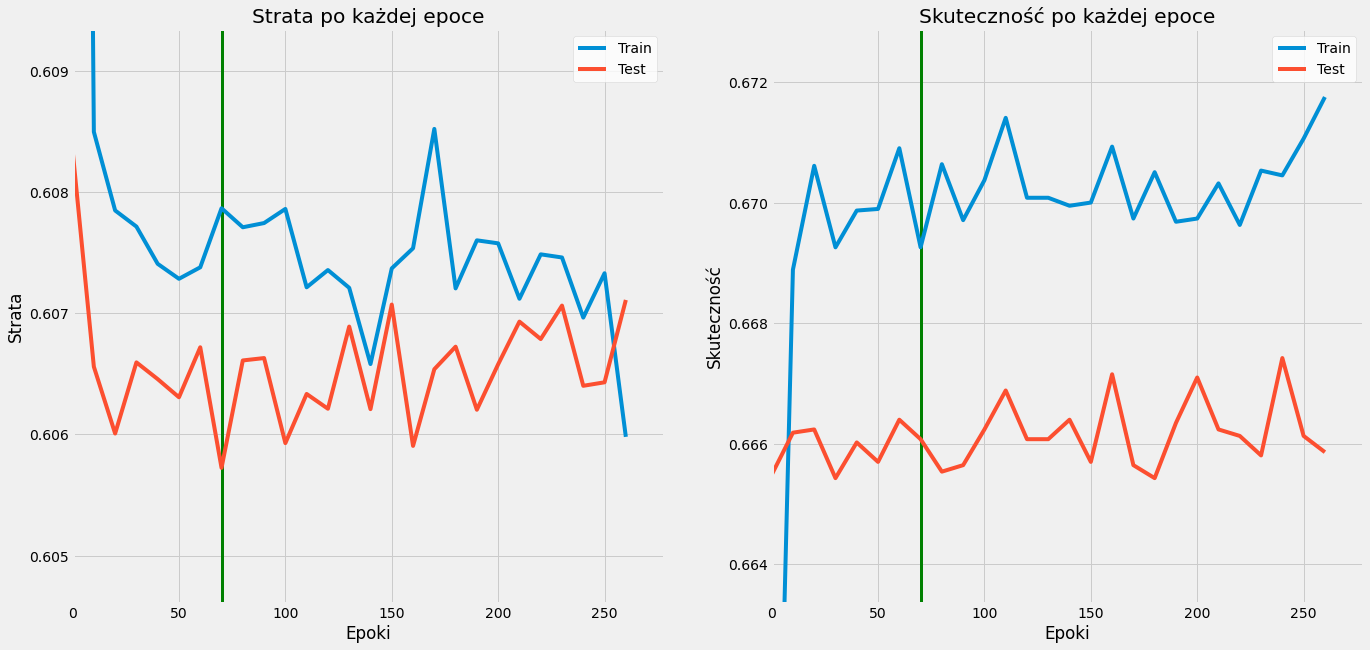

In [27]:
epochs, loss, val_loss, accuracy, val_accuracy = (history.epoch, 
                                                  history.history['loss'], 
                                                  history.history['val_loss'], 
                                                  history.history['accuracy'], 
                                                  history.history['val_accuracy'])


fig, (ax1, ax2) = plt.subplots(1,2)

ax1.set_title('Strata po każdej epoce')
ax1.plot(epochs[::10], loss[::10], label='Train')
ax1.plot(epochs[::10], val_loss[::10], label='Test')
ax1.vlines(val_loss.index(np.min(val_loss))+3, 0, 1, linewidths=3, colors='green')
ax1.legend(['Train', 'Test'], facecolor='white',fancybox=True)
ax1.set_xlabel('Epoki')
ax1.set_ylabel('Strata')
ax1.set_xlim(0, len(epochs) + 10)
ax1.set_ylim(np.min(val_loss) - 0.001, np.max(val_loss) + 0.001)

ax2.set_title('Skuteczność po każdej epoce')
ax2.plot(epochs[::10], accuracy[::10], label='Train')
ax2.plot(epochs[::10], val_accuracy[::10], label='Test')
ax2.vlines(val_loss.index(np.min(val_loss))+3, 0, 1, linewidths=3, colors='green')
ax2.legend(['Train', 'Test'], facecolor='white',fancybox=True)
ax2.set_xlabel('Epoki')
ax2.set_ylabel('Skuteczność')
ax2.set_xlim(0, len(epochs) + 10)
ax2.set_ylim(np.min(val_accuracy) - 0.001, np.max(accuracy) + 0.001)


fig.set_size_inches(20,10)
fig.tight_layout(pad=3.0)
fig.savefig('performance')

In [28]:
frame.replace(frame['round'].unique(),[0,1,2,7,3,4,5,6],inplace=True)
australian_open = frame.loc[frame['tourney_name'] == 'Australian Open']
atp_cup = frame.loc[frame['tourney_name'] == 'Atp Cup']
doha = frame.loc[frame['tourney_name'] == 'Doha']
adelaide = frame.loc[frame['tourney_name'] == 'Adelaide']
auckland = frame.loc[frame['tourney_name'] == 'Auckland']
cordoba = frame.loc[frame['tourney_name'] == 'Cordoba']
pune = frame.loc[frame['tourney_name'] == 'Pune']
montpellier = frame.loc[frame['tourney_name'] == 'Montpellier']
buenos_aires = frame.loc[frame['tourney_name'] == 'Buenos Aires']
new_york = frame.loc[frame['tourney_name'] == 'New York']
rotterdam = frame.loc[frame['tourney_name'] == 'Rotterdam']
rio = frame.loc[frame['tourney_name'] == 'Rio De Janeiro']
delray = frame.loc[frame['tourney_name'] == 'Delray Beach']
marseille = frame.loc[frame['tourney_name'] == 'Marseille']
acapulco = frame.loc[frame['tourney_name'] == 'Acapulco']
santiago = frame.loc[frame['tourney_name'] == 'Santiago']
dubai = frame.loc[frame['tourney_name'] == 'Dubai']

In [29]:
def acc(tournament):
  suma = 0
  for i in tournament.index:
    if tournament['winner'][i] == tournament['prediction'][i]:
      suma += 1
    
  return suma/tournament.shape[0]

In [30]:
print("Tournament accuracy:")
for i in [australian_open,atp_cup,doha,adelaide,auckland,cordoba,pune,montpellier,buenos_aires,
          new_york,rotterdam,rio,delray,marseille,acapulco,acapulco,santiago,dubai]:
    print(f"{i['tourney_name'].unique()[0]}: {round(acc(i) * 100, 2)}")

Tournament accuracy:
Australian Open: 71.65
Atp Cup: 67.44
Doha: 62.96
Adelaide: 66.67
Auckland: 55.56
Cordoba: 70.37
Pune: 62.96
Montpellier: 55.56
Buenos Aires: 62.96
New York: 51.85
Rotterdam: 58.06
Rio De Janeiro: 54.84
Delray Beach: 64.52
Marseille: 59.26
Acapulco: 64.52
Acapulco: 64.52
Santiago: 55.56
Dubai: 80.65
